# Section 0: Understanding Data

In [975]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [5]:
#Deep Learning
!pip install tensorflow
!pip install keras 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from keras.optimizers import SGD
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=82583f7a0f7c28e07fe190fb15f777ba95efc328a7fa81f7b05f4b1b20a8c2ce
  Stored in directory: c:\users\ruiji\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


# Section 0.1: Data Description
We import data as a pandas dataframe

In [1299]:
df = pd.read_csv("bike_sharing_dataset.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


Summary: This dataset doesn't include any nan values. The count of new bike shares has large standard deviation, which means there is a lot of variance in the observed data. We notice that cnt, t1, t2, hum, and wind_speed are numerical values. However, 
weather_code, is_holiday (binary), is_weekend (binary), and season are categorical data.

In [1092]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


# Section 0.2: Cleaning Dataset
Since 'season' column was denoted as (0-spring ; 1-summer; 2-fall; 3-winter), we should transform them to binary data, and we used pd.get_dummies() function to set dummy variables for season. We also set dummy variables for weather_code. 

In [1300]:
#dummy variable
data = pd.get_dummies(df, columns = ['season'])
data = pd.get_dummies(data, columns = ['weather_code'])
data

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,0,1,0,0,1,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0


First of all, we didn't realize the importance of hourly data, so we droped hourly data and just kept date. However, we found the performace of the data is not good enough. Then, we extract hours data for training the model.

In [1301]:
hour = pd.to_datetime(data['timestamp']).dt.hour.values
data['hour'] = hour
data

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,0,1,0,0,1,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,22


Based on personal experience (domain knowledge), we believe we should categorize different groups because the counts of new bikes shares can vary a lot in a day. If we ignore hours' information or directly drop it, it can cause a problem that the new counts of new bike shares at 3 am will be similar as those at 8 am. However, this result doesn't follow the real cases. Therefore, we create three categorical variables (binary), 'busy', 'day', and 'night'. We set 8, 9, 17, and 18 as 1 and others as 0 in 'busy' column because these are normally commuting hours of weekdays. We set 7, 10, 11, 12, 13, 14, 15, 16, 19, and 20 as 1 and others as 0 in 'day' column because most of people go outside and do activities during the day. In the contrast, we set 0, 1, 2, 3, 4, 5, 6, 21, 22, and 23 as 1 in others as 0 in 'night' column because most of people will stay at home or go to sleep. It decreases rmse by 40% approximately.

In [1302]:
data['busy'] = [1 if x in [8, 9, 17, 18] else 0 for x in hour]
data['night'] = [1 if x in [0, 1, 2, 3, 4, 5, 6, 21, 22, 23] else 0 for x in hour]
data['day'] = [1 if x in [7, 10, 11, 12, 13, 14, 15, 16, 19, 20] else 0 for x in hour]
data = data.drop(columns=['hour'])
data

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,...,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,busy,night,day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0


We want to know the correlation between each variable. Since we have to predict the count of new bike shares, we focus on the first column. We find that 'cnt' is more correlated to variables, such as real temperature in Celsiust (t1), "feels like" temperature in Celsius (t2), humidity in percentage (hum), busy, night, and day.

<AxesSubplot:>

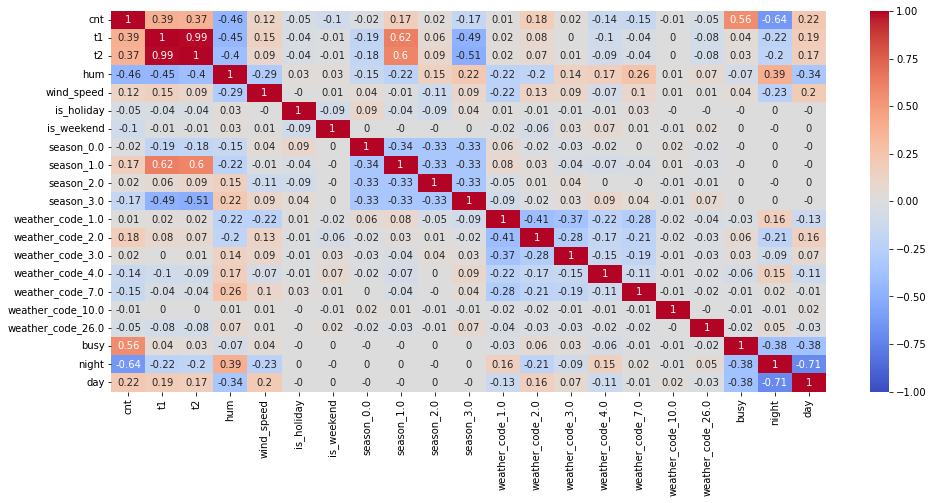

In [1248]:
plt.figure(figsize = (16,7))
sns.heatmap(data.corr("pearson").round(2), cmap = 'coolwarm', annot = True, vmin=-1, vmax=1)

# Section 0.3: Cross-validation Preparation
We transform 'timestamp' to 'date', which can be easier for us to find the index of 2016-09-30. Data records between 2015-01-
04 and 2016-09-30 are the training set. Data records between 2016-10-01 and 2017-01-03 are the test set.

In [1098]:
#train/test split
data['timestamp'] = pd.to_datetime(data['timestamp'],format='%Y-%m-%d')
training = data.loc[(data['timestamp'] >= '2015-01-04') & (data['timestamp'] <= '2016-09-30')]
test = data.loc[(data['timestamp'] >= '2016-10-01') & (data['timestamp'] <= '2017-01-03')]
training

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,...,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,busy,night,day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,2016-09-29 20:00:00,1333,16.0,16.0,57.0,22.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
15109,2016-09-29 21:00:00,1037,15.0,15.0,65.5,22.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
15110,2016-09-29 22:00:00,773,14.5,14.5,65.0,21.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
15111,2016-09-29 23:00:00,572,14.0,14.0,69.5,19.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0


Separate data to predictors (Xs) and target (Y) in training set and the test set. Find lengths of the training set and the test set.

In [172]:
#X/Y Split
trainingData = training.dropna()
trainingData = trainingData.iloc[:,1:].to_numpy()
xTrain = trainingData[:,1:]
yTrain = trainingData[:,0]
testData = test.dropna()
testData = testData.iloc[:,1:].to_numpy()
xTest = testData[:,1:]
yTest = testData[:,0]
print(len(xTrain))
print(len(xTest))

15113
2255


In [317]:
#PCA
# zscored = stats.zscore(xTrain)
# pca = PCA().fit(zscored)
# eigVals = pca.explained_variance_
# loadings = pca.components_*-1
# rotatedData = pca.fit_transform(zscored)*-1
# print(eigVals)
# n = 8
# plt.bar(np.linspace(1,n,n),eigVals)
# plt.xlabel("Principal Components")
# plt.ylabel("Eigenvalues")
# plt.show()

# threshold = 1
# kaiser = np.count_nonzero(eigVals > threshold)
# print(kaiser)

# for i in range(kaiser):
#     plt.subplot(2, 2, i+1)
#     plt.bar(np.linspace(1,n,n),loadings[i,:])
#     plt.xlabel('Predictors')
#     plt.ylabel('Loading')
# plt.show()

# Section 1: Processing Data

# Section 1.1 Normalize Data
In this part, we used two ways to normalize the data. The first way is normalizing the whole dataset. The second way is only normalize target because we don't want to lose information in predictors. In addition, we don't need 'timestamp' column for prediction, so we have to drop it at the beginning.

1. We utilize MinMaxScaler to normalize data and make them between 0 and 1. For categorical data, they are binary data, so they will remain the same. Base on the previous result, we know that the length of the training set is 15113, and we will use this number as index to separate the normalized data array to training and test sets.

In [1303]:
#Normalize the whole dataset.
Data = data.drop(columns=['timestamp'])
scaler_Data = MinMaxScaler().fit(Data.values)
Data_scaled = scaler_Data.transform(Data.values)

target = Data_scaled[:,0].reshape(-1,1)
Data_scaled = Data_scaled[:,1:]
xTrain = Data_scaled[:15113, :]
yTrain = target[:15113,:]
xTest = Data_scaled[15113:,:]
yTest = target[15113:,:]

In [1241]:
Data

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,hour
0,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,0,1,0,0,1,0,0,0,0,0
1,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,1
2,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,2
3,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,3
4,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,19
17410,541,5.0,1.0,81.0,21.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,20
17411,337,5.5,1.5,78.5,24.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,21
17412,224,5.5,1.5,76.0,23.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,22


2. The second method is only normalizing 'cnt' column (target), keep predictors as the original data. Other steps are same as previous procedures.

In [1099]:
#Normalize the cnt.
Data = data.drop(columns=['timestamp'])
predictors = Data.to_numpy()
predictors = predictors[:,1:]
target = MinMaxScaler().fit_transform(Data.iloc[:,0].values.reshape(-1,1))

xTrain = predictors[:15113, :]
yTrain = target[:15113,:]
xTest = predictors[15113:, :]
yTest = target[15113:,:]

In [1209]:
len(yTrain)

15113

# Section 2: Model Training and Testing

We use six different models to predict the count of new bike shares (cnt). Since 'cnt' is numerical values, we have to use regression models. In this part, we use linear regression, lasso regression, decision tree regressor, random forest regressor, neural networks, and NeuralProphet to predict 'cnt', and then we will compare root mean squared error (RMSE) and mean absolute error (MAE) to evaluate the models performance and select the most suitable one for this task. 

# Section 2.1: Multiple Linear Regression
We just fit the data to the most simple model, linear regression, by using LinearRegression() function. We try different training inputs and compare RMSE and MAE to pick the best model. The performance of model is much better while considering hours, and the correlation between actual values and predicated values is increasing (see following results).

In [978]:
#Multiple Linear Regression (Season Split)
def linear_regression(x_train, y_train, x_test, y_test):
    model1 = LinearRegression().fit(x_train,y_train)
    beta0 = model1.intercept_
    beta1 = model1.coef_
    prediction = model1.predict(x_test)
    corr1 = np.corrcoef(prediction,y_test)[0,1]
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,prediction)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    
    plt.plot(yTest,prediction,'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()


Model based on data without focusing on hours in each day.

C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


MAE: 0.08152107643831674
MSE: 0.014851818107801644
RMSE: 0.12186803562789401


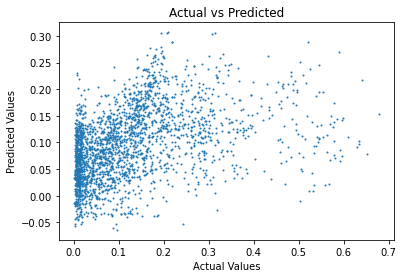

In [985]:
linear_regression(xTrain, yTrain, xTest, yTest)

Model focusing on hours in each day and we normalizing the 'cnt'

C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


MAE: 0.05645993915079857
MSE: 0.006352596352126542
RMSE: 0.07970317654978716


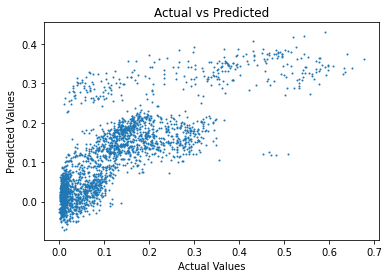

In [1100]:
linear_regression(xTrain, yTrain, xTest, yTest)

Model focusing on hours in each day and we normalizing the whole dataset.

C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


MAE: 0.056571012093710564
MSE: 0.006366224463373711
RMSE: 0.0797886236463176


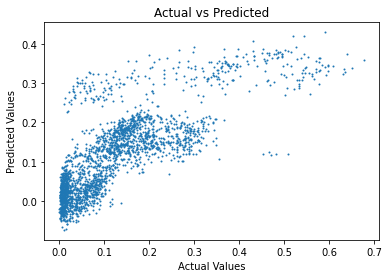

In [1110]:
linear_regression(xTrain, yTrain, xTest, yTest)

# Section 2.2: Lasso

Normally, Lasso regression performces better than linear regression by adding penalty terms, so we decide to check if is better than linear regression to predict the counts of new bike shares. The metrics are RMSE and MAE. We loop several alpha values (0.001, 0.004, 0.008, 0.015), and plot the RMSE and MAE of each value. Then, we decide to use the model that has the lowest RMSE and visualize the graph of predicted values vs actual values. Finally, the RMSE is 0.07991 and the MAE is 0.05589. However, based on RMSE and MAE, we don't think Lasso is better than linear regression, and the performance of them is similar. 

In [1204]:
def lasso(a, x_train, y_train, x_test, y_test):
    mse = []
    mae = []
    pred = []
    for i in a:
        model2 = Lasso(alpha=i).fit(x_train,y_train)
        prediction = model2.predict(x_test)
        pred.append(prediction)
        mse.append(mean_squared_error(y_test,prediction))
        mae.append(mean_absolute_error(y_test,prediction))
    rmse = (np.sqrt(mse))
    best_mae = np.min(mae)
    best_mse = np.min(mse)
    best_rmse = np.min(rmse)
    index = np.where(rmse == best_rmse)[0][0]
    
    print(f"MAE: {best_mae.round(5)}")
    print(f"MSE: {best_mse.round(5)}")
    print(f"RMSE: {best_rmse.round(5)}")  
    plt.figure(figsize=(17, 10))
    plt.subplot(2,2,1)
    plt.plot(a, rmse, label = a)
    plt.xlabel('Parameters')
    plt.ylabel('RMSE')
    plt.xticks(a)
    plt.title('RMSE of Parameters')
    plt.subplot(2,2,2)
    plt.plot(a, mae, label = a)
    plt.xlabel('Parameters')
    plt.ylabel('MAE')
    plt.title('MAE of Parameters')
    plt.xticks(a)
    plt.subplot(2,2,3)
    plt.plot(y_test,pred[index],'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()
    


Model based on data without focusing on hours in each day.

MAE: 0.0808524727365288
MSE: 0.014136232181916638
RMSE: 0.11889588799414653


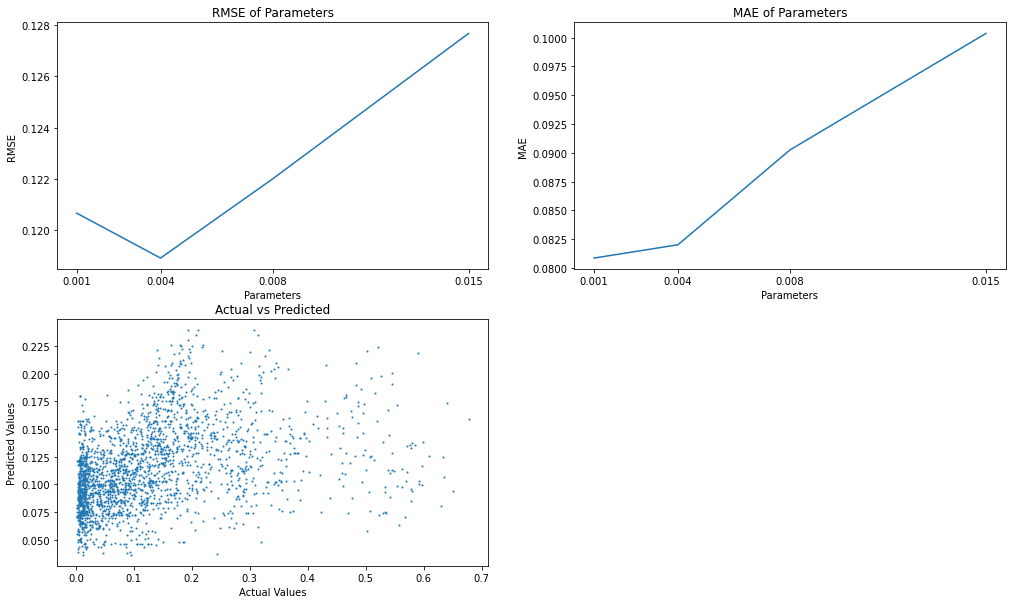

In [1065]:
lasso([0.001, 0.004, 0.008, 0.015], xTrain, yTrain, xTest, yTest)

Model focusing on hours in each day and we normalizing the 'cnt'

MAE: 0.05585343920573094
MSE: 0.006385249667130263
RMSE: 0.07990775724002185


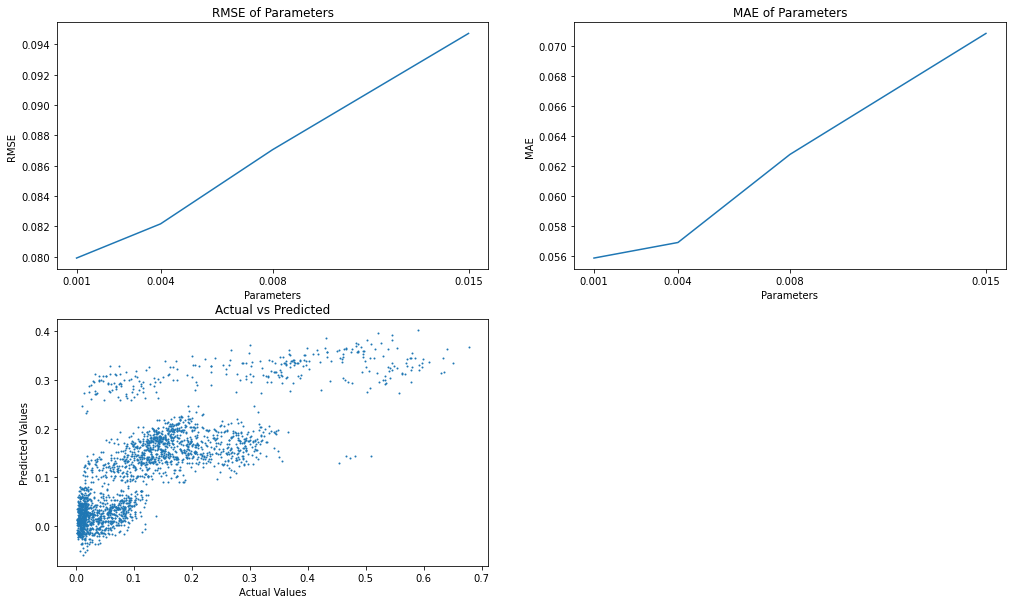

In [1201]:
lasso([0.001, 0.004, 0.008, 0.015], xTrain, yTrain, xTest, yTest)

Model focusing on hours in each day and we normalizing the whole dataset.

MAE: 0.05585
MSE: 0.00639
RMSE: 0.07991


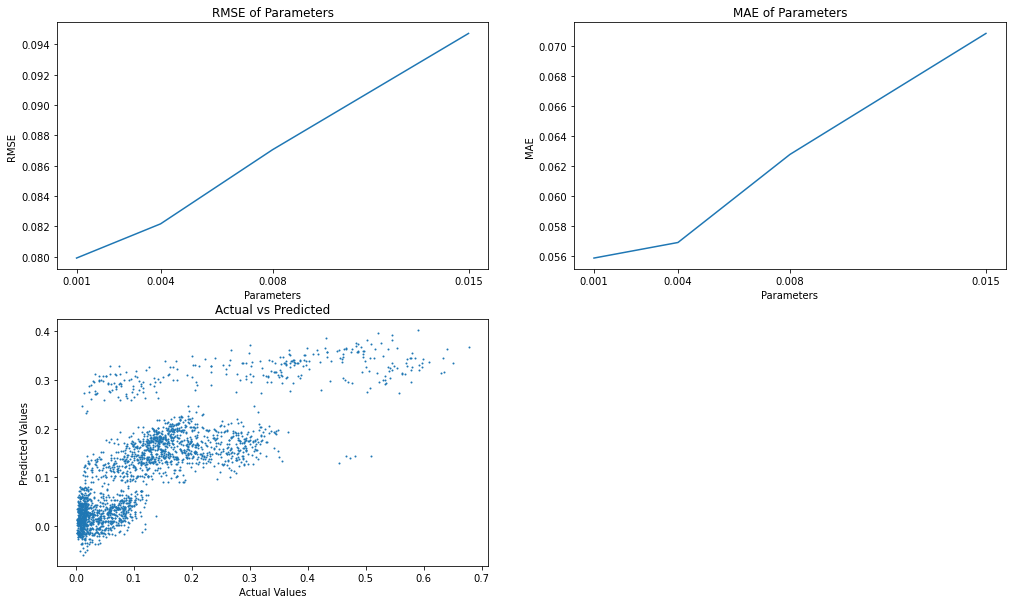

In [1205]:
lasso([0.001, 0.004, 0.008, 0.015], xTrain, yTrain, xTest, yTest)

# Section 2.3: Decision Tree Regressor
We decide to try some non-linear models for this task. Since we should predict numerical values, we choose DecisionTreeRegressor() as the first non-linear model. This is because Decision Tree is easily comprehensible and more robust than linear model. We loop several depths (3,6,9,12,15), and plot the RMSE and MAE of each model's prediction. Then, we decide to use the model that has the lowest RMSE and visualize the graph of predicted values vs actual values. Finally, we choose the depth at 9, and the RMSE is 0.06367 and the MAE is 0.04464. We can notice that it improves the performance.

In [1072]:
def decision_tree(depths, x_train, y_train, x_test, y_test):
    mse = []
    mae = []
    pred = []
    for i in depths:
        model4 = DecisionTreeRegressor(max_depth=i)
        model4.fit(x_train,y_train)
        prediction = model4.predict(x_test)
        pred.append(prediction)
        mse.append(mean_squared_error(y_test,prediction))
        mae.append(mean_absolute_error(y_test,prediction))
    rmse = (np.sqrt(mse))
    best_mae = np.min(mae)
    best_mse = np.min(mse)
    best_rmse = np.min(rmse)
    index = np.where(rmse == best_rmse)[0][0]

    print(f"MAE: {best_mae}")
    print(f"MSE: {best_mse}")
    print(f"RMSE: {best_rmse}")  
    plt.figure(figsize=(17, 10))
    plt.subplot(2,2,1)
    plt.plot(depths, rmse, label = depths)
    plt.xlabel('Parameters')
    plt.ylabel('RMSE')
    plt.xticks(depths)
    plt.title('RMSE of Parameters')
    plt.subplot(2,2,2)
    plt.plot(depths, mae, label = depths)
    plt.xlabel('Parameters')
    plt.ylabel('MAE')
    plt.title('MAE of Parameters')
    plt.xticks(depths)
    plt.subplot(2,2,3)
    plt.plot(y_test,pred[index],'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()



Model based on data without focusing on hours in each day.

MAE: 0.08087647576564601
MSE: 0.014496776756593544
RMSE: 0.12040256125429202


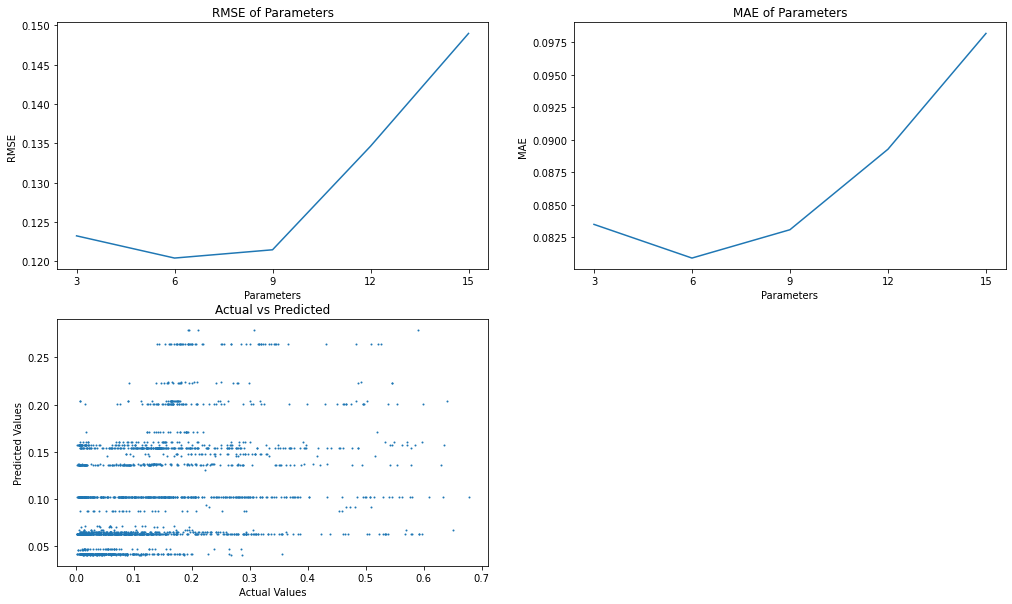

In [1073]:
decision_tree([3,6,9,12,15], xTrain, yTrain, xTest, yTest) 

Model focusing on hours in each day and we normalizing the 'cnt'

MAE: 0.04464103456551816
MSE: 0.004053624914330225
RMSE: 0.06366808395365943


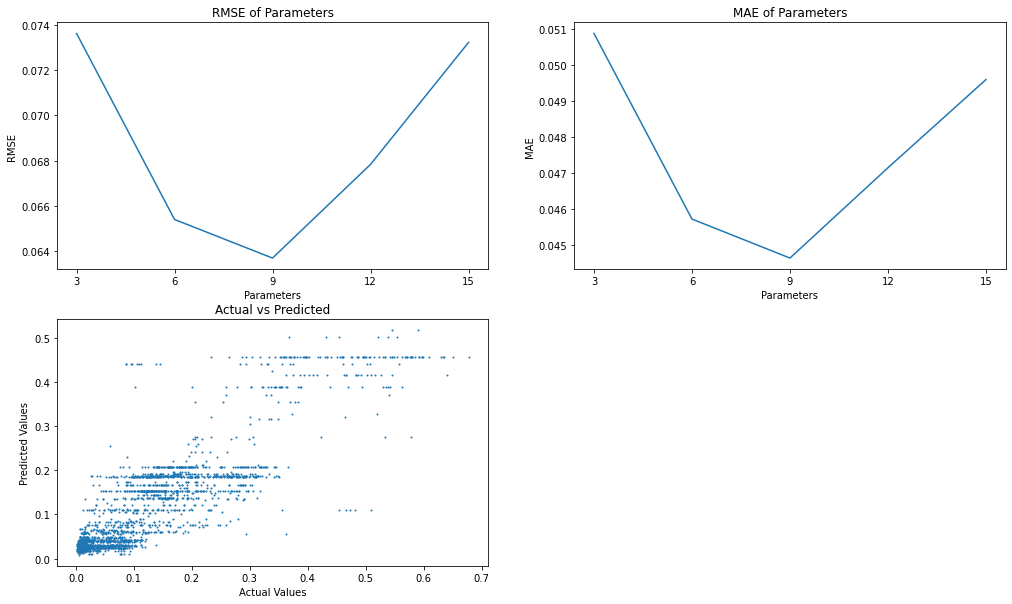

In [1104]:
decision_tree([3,6,9,12,15], xTrain, yTrain, xTest, yTest) 

Model focusing on hours in each day and we normalizing the whole dataset.

MAE: 0.04464103456551816
MSE: 0.004053624914330225
RMSE: 0.06366808395365943


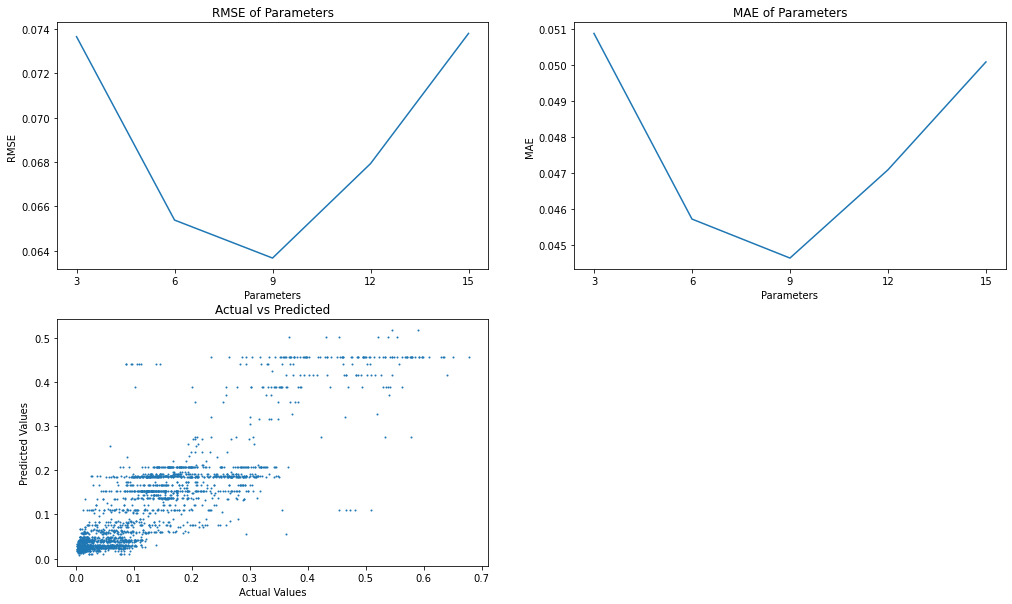

In [1112]:
decision_tree([3,6,9,12,15], xTrain, yTrain, xTest, yTest) 

# Section 2.4: Random Forests Regressor
Random Forests consist of multiple decision trees each based on random samples of the training set, so normally they are more robust than single decision tree. We loop several depths (60,65,70,75,80,85), and plot the RMSE and MAE of each model's prediction. Although the RMSE and MAE fluctuate a lot at these depths, we still decide to use the model that has the lowest RMSE and visualize the graph of predicted values vs actual values. Finally, we choose the depth at 85, and the RMSE is 0.06309 and the MAE is 0.04365. We can notice that the performance of this model is similar to decision tree, and I will use more computing resources. Although we think we can try to improve this model better, we decide not to try further. This is because we find neural networks can give us a better model. 

In [257]:
from sklearn.ensemble import RandomForestRegressor

In [1081]:
#Random Forest
def random_forest(depths, x_train, y_train, x_test, y_test):
    mse = []
    mae = []
    pred = []
    for i in depths:
        model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
        model_random_forest.fit(x_train,y_train)
        prediction = model_random_forest.predict(x_test)
        pred.append(prediction)
        mse.append(mean_squared_error(y_test,prediction))
        mae.append(mean_absolute_error(y_test,prediction))
    rmse = (np.sqrt(mse))
    best_mae = np.min(mae)
    best_mse = np.min(mse)
    best_rmse = np.min(rmse)
    index = np.where(rmse == best_rmse)[0][0]

    print(f"MAE: {best_mae}")
    print(f"MSE: {best_mse}")
    print(f"RMSE: {best_rmse}")  
    plt.figure(figsize=(17, 10))
    plt.subplot(2,2,1)
    plt.plot(depths, rmse, label = depths)
    plt.xlabel('Parameters')
    plt.ylabel('RMSE')
    plt.xticks(depths)
    plt.title('RMSE of Parameters')
    plt.subplot(2,2,2)
    plt.plot(depths, mae, label = depths)
    plt.xlabel('Parameters')
    plt.ylabel('MAE')
    plt.title('MAE of Parameters')
    plt.xticks(depths)
    plt.subplot(2,2,3)
    plt.plot(y_test,pred[index],'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()
    


Model based on data without focusing on hours in each day.

C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a

MAE: 0.08454471615817856
MSE: 0.015096186847204348
RMSE: 0.12286654079611889


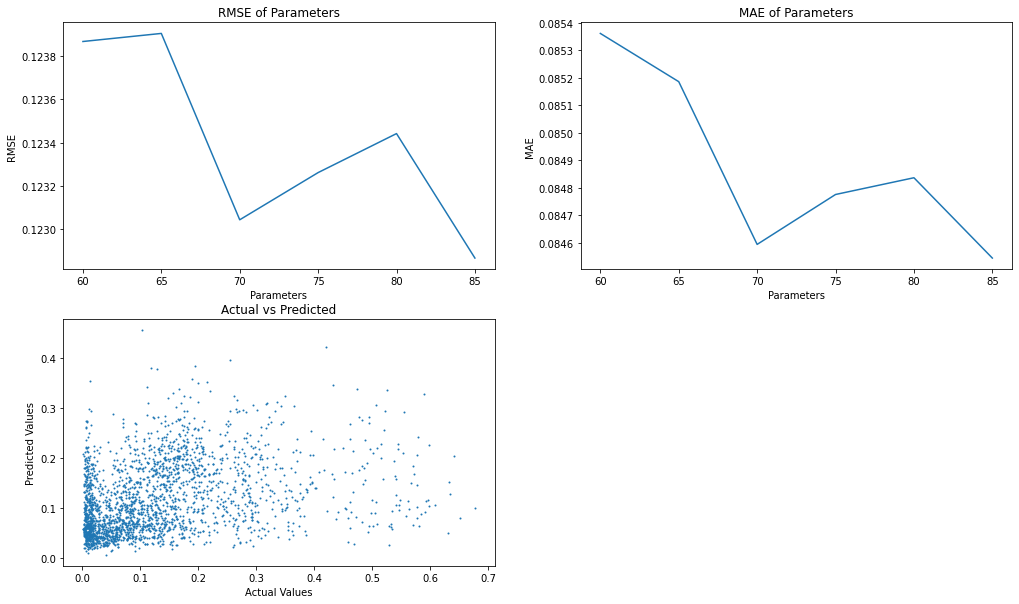

In [1082]:
random_forest([60,65,70,75,80,85], xTrain, yTrain, xTest, yTest) 

Model focusing on hours in each day and we normalizing the 'cnt'

C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a

MAE: 0.0436477486691831
MSE: 0.0039804820216990805
RMSE: 0.06309106134547968


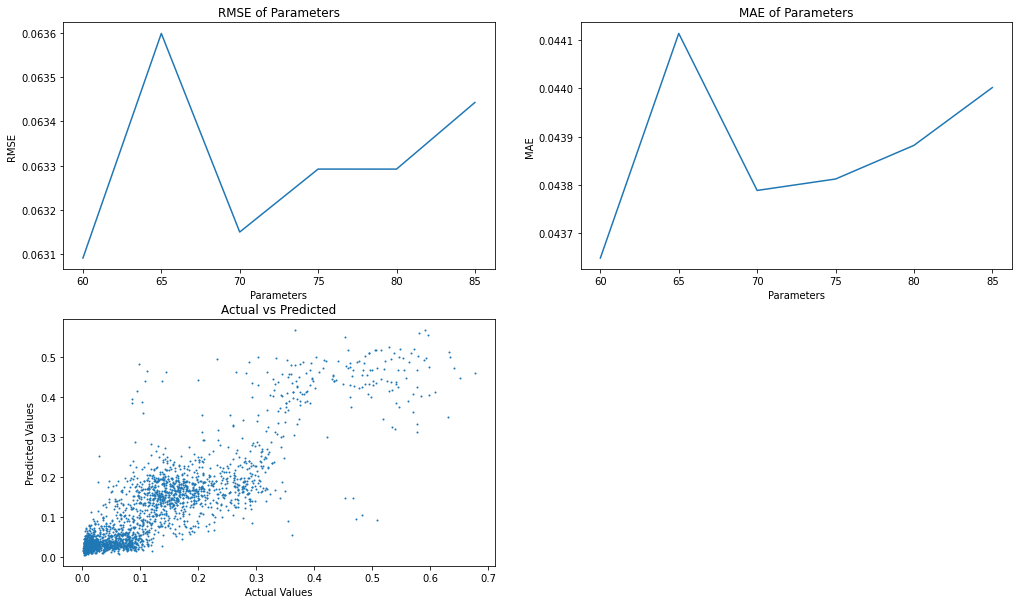

In [1105]:
random_forest([60,65,70,75,80,85], xTrain, yTrain, xTest, yTest) 

Model focusing on hours in each day and we normalizing the whole dataset.

C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a

MAE: 0.04396710836744626
MSE: 0.004051090385623042
RMSE: 0.06364817660878466


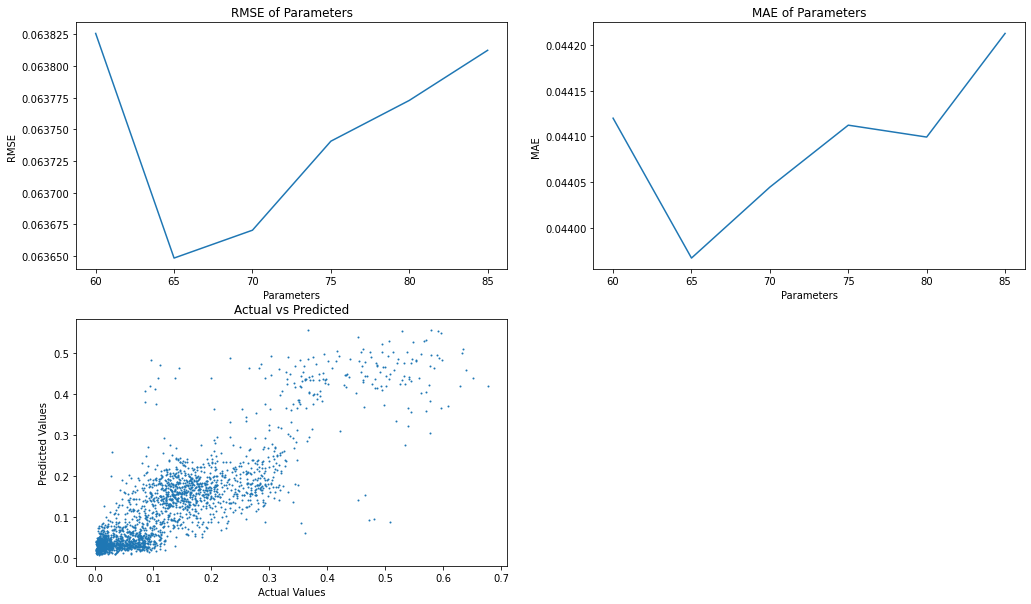

In [1113]:
random_forest([60,65,70,75,80,85], xTrain, yTrain, xTest, yTest)

# Section 2.5: Deep Learning - Neural Network
The last non-linear model we have tried is neural network. We change lots of hyperparameters and try to find the most suitable hyperparameters for this task. Firstly, we design two models having two hidden layers and three hidden layers separately, and we changed different hyperparameters based on these two hidden layers. We choose MSE as the loss function and RMSE as the metrics. In addition, we try two optimizer SGD and Adam, and we notice that Adam performs much better than SGD. Furthermore, after several try, we think epochs = 15 and batch_size can also make the models perform well. Finally, since normally people use 'relu' function as the layers activation functions, we also decide to use it and find 'sigmoid' function can effectively decrease RMSE as the output activation function compared to other functions.

We write a function to train models having two hidden layers.

In [1249]:
def deep_learning_2(input_dim, layer1_units, layer2_units, optimizer):
    loss = 'mean_squared_error'
    metrics = [RootMeanSquaredError()]
    epochs = 15
    batch_size = 64
    layer1_activation = 'relu'
    layer2_activation = 'relu'
    output_activation = 'sigmoid'
    layer1_dropout_rate = 0.05
    layer2_dropout_rate = 0.00
    
    model3 = Sequential()
    model3.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model3.add(Dropout(layer1_dropout_rate))
    model3.add(Dense(layer2_units, activation=layer2_activation))
    model3.add(Dropout(layer2_dropout_rate))
    model3.add(Dense(1, activation=output_activation))
    model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model3

We write a function to train models having three hidden layers.

In [1250]:
def deep_learning_3(input_dim, layer1_units, layer2_units, layer3_units, optimizer):
    loss = 'mean_squared_error'
    metrics = [RootMeanSquaredError()]
    epochs = 15
    batch_size = 64
    layer1_activation = 'relu'
    layer2_activation = 'relu'
    layer3_activation = 'relu'
    output_activation = 'sigmoid'
    layer1_dropout_rate = 0.05
    layer2_dropout_rate = 0.02
    layer3_dropout_rate = 0.00
    
    model3 = Sequential()
    model3.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model3.add(Dropout(layer1_dropout_rate))
    model3.add(Dense(layer2_units, activation=layer2_activation))
    model3.add(Dropout(layer2_dropout_rate))
    model3.add(Dense(layer3_units, activation=layer3_activation))
    model3.add(Dropout(layer3_dropout_rate))
    model3.add(Dense(1, activation=output_activation))
    model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model3

Write a function to show the predicted values and visualize the results.

In [1251]:
def pred(history_test, model_test):
    prediction = model_test.predict(xTest)
    print(mean_absolute_error(yTest,prediction))
    print(mean_squared_error(yTest,prediction))
    print(np.sqrt(mean_squared_error(yTest,prediction)))
    plt.figure(figsize=(17, 10))
    plt.subplot(1,2,1)
    plt.plot(history_test.history['root_mean_squared_error'])
    plt.plot(history_test.history['val_root_mean_squared_error'])
    plt.title('Model RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.subplot(1,2,2)
    plt.plot(yTest,prediction,'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()

Model with two hidden layers and 10 layer units separately. We use SGD as the optimizer, but the performance is bad.

In [1261]:
optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
model_test = deep_learning_2(Data_scaled.shape[1], 10, 10, optimizer_SGD)
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, verbose=1,shuffle=True, 
                              validation_data=(xTest,yTest))

Model: "sequential_215"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_731 (Dense)           (None, 10)                190       
                                                                 
 dropout_485 (Dropout)       (None, 10)                0         
                                                                 
 dense_732 (Dense)           (None, 10)                110       
                                                                 
 dropout_486 (Dropout)       (None, 10)                0         
                                                                 
 dense_733 (Dense)           (None, 1)                 11        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
237/237 [==============================] - 2s 6ms/step - loss: 0.0559 - root_mean_squared_error: 0.2364 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1467
Epoch 2/15
237/237 [==============================] - 1s 6ms/step - loss: 0.0201 - root_mean_squared_error: 0.1418 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249
Epoch 3/15
237/237 [==============================] - 1s 6ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1221
Epoch 4/15
237/237 [==============================] - 2s 7ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 5/15
237/237 [==============================] - 2s 7ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209
Epoch 6/15
237/237 [==============================] - 2s 7ms/step - loss: 0.0179 - root_mean_squared_error: 0.1337 - val_loss: 0.0145 - val_

In [1262]:
history_test.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

72/72 [==============================] - 0s 2ms/step
0.09042423348272172
0.014169572776548898
0.11903601461973136


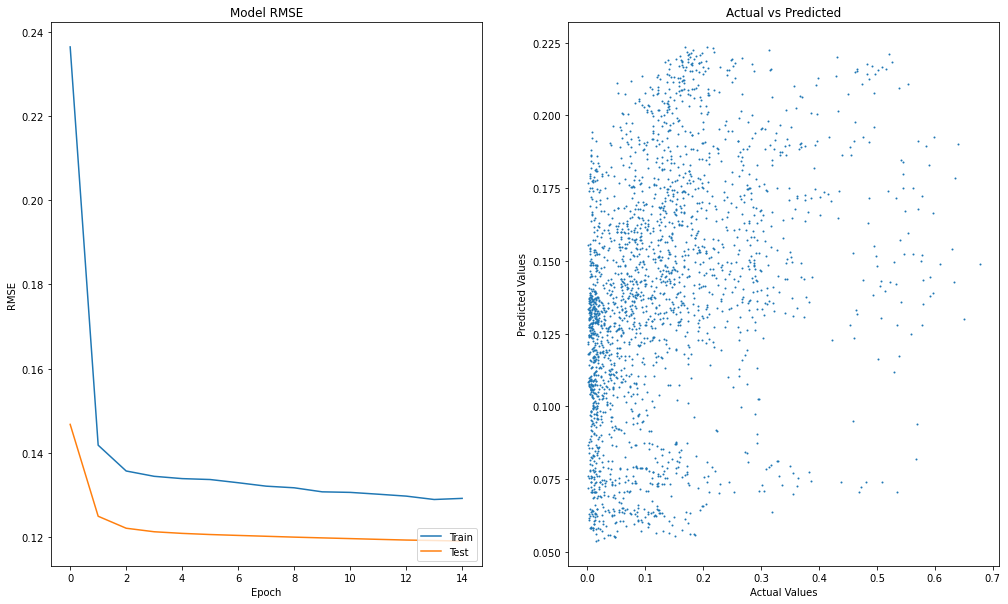

In [1263]:
pred(history_test, model_test)

Model with two hidden layers and 10 layer units separately. We change the optimizer from SGD to Adam, and the performance increases a lot.

In [1257]:
optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
model_test = deep_learning_2(Data_scaled.shape[1], 10, 10, optimizer_Adam)
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, verbose=1,shuffle=True, 
                              validation_data=(xTest,yTest))

Model: "sequential_213"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_724 (Dense)           (None, 10)                190       
                                                                 
 dropout_480 (Dropout)       (None, 10)                0         
                                                                 
 dense_725 (Dense)           (None, 10)                110       
                                                                 
 dropout_481 (Dropout)       (None, 10)                0         
                                                                 
 dense_726 (Dense)           (None, 1)                 11        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
237/237 [==============================] - 7s 22ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1169
Epoch 2/15
237/237 [==============================] - 1s 6ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0955
Epoch 3/15
237/237 [==============================] - 1s 5ms/step - loss: 0.0094 - root_mean_squared_error: 0.0969 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0943
Epoch 4/15
237/237 [==============================] - 1s 5ms/step - loss: 0.0088 - root_mean_squared_error: 0.0936 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885
Epoch 5/15
237/237 [==============================] - 1s 6ms/step - loss: 0.0082 - root_mean_squared_error: 0.0903 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 6/15
237/237 [==============================] - 2s 8ms/step - loss: 0.0071 - root_mean_squared_error: 0.0842 - val_loss: 0.0061 - val

72/72 [==============================] - 0s 5ms/step
0.035503578426196274
0.002957828837996689
0.05438592499899849


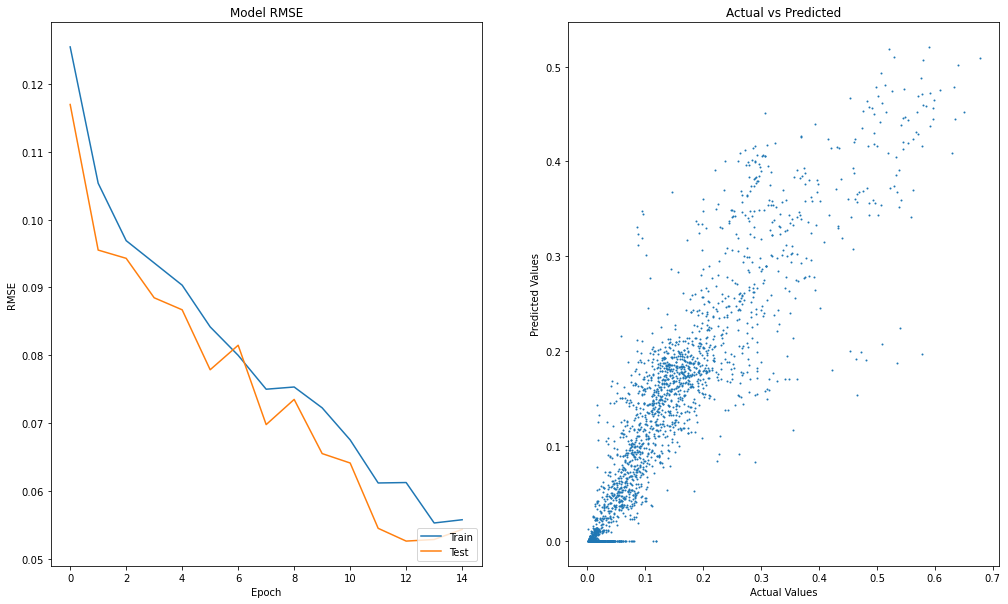

In [1258]:
pred(history_test, model_test)

Model with two hidden layers and 15 layer units separately. The increase of layer units also increase the RMSE.

In [1268]:
optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
model_test = deep_learning_2(Data_scaled.shape[1], 15, 15, optimizer_Adam)
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, verbose=1,shuffle=True, 
                              validation_data=(xTest,yTest))

Model: "sequential_218"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_740 (Dense)           (None, 15)                285       
                                                                 
 dropout_491 (Dropout)       (None, 15)                0         
                                                                 
 dense_741 (Dense)           (None, 15)                240       
                                                                 
 dropout_492 (Dropout)       (None, 15)                0         
                                                                 
 dense_742 (Dense)           (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
237/237 [==============================] - 2s 5ms/step - loss: 0.0145 - root_mean_squared_error: 0.1203 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963
Epoch 2/15
237/237 [==============================] - 1s 5ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0880
Epoch 3/15
237/237 [==============================] - 1s 5ms/step - loss: 0.0078 - root_mean_squared_error: 0.0882 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 4/15
237/237 [==============================] - 1s 5ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 5/15
237/237 [==============================] - 1s 6ms/step - loss: 0.0072 - root_mean_squared_error: 0.0851 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0835
Epoch 6/15
237/237 [==============================] - 1s 6ms/step - loss: 0.0068 - root_mean_squared_error: 0.0825 - val_loss: 0.0069 - val_

72/72 [==============================] - 0s 5ms/step
0.03970647395350386
0.0040085065038303926
0.06331276730510516


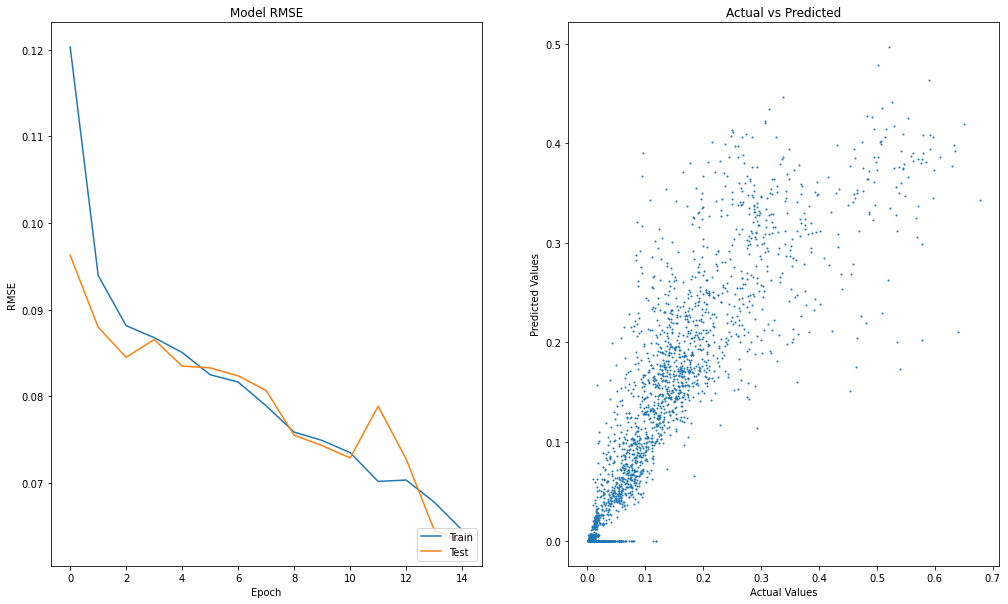

In [1269]:
pred(history_test, model_test)

We try the model with three hidden layers and epochs = 10. 15, 15, and 10 are layers' units. This model has the best performance. 

In [1294]:
optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
model_test = deep_learning_3(Data_scaled.shape[1], 15, 15, 10, optimizer_Adam)
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=10, batch_size=batch_size, shuffle=True, 
                              validation_data=(xTest,yTest))

Model: "sequential_231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_791 (Dense)           (None, 15)                285       
                                                                 
 dropout_529 (Dropout)       (None, 15)                0         
                                                                 
 dense_792 (Dense)           (None, 15)                240       
                                                                 
 dropout_530 (Dropout)       (None, 15)                0         
                                                                 
 dense_793 (Dense)           (None, 10)                160       
                                                                 
 dropout_531 (Dropout)       (None, 10)                0         
                                                                 
 dense_794 (Dense)           (None, 1)              

C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
237/237 [==============================] - 2s 5ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0941
Epoch 2/10
237/237 [==============================] - 2s 8ms/step - loss: 0.0087 - root_mean_squared_error: 0.0932 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0857
Epoch 3/10
237/237 [==============================] - 1s 5ms/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0777
Epoch 4/10
237/237 [==============================] - 1s 4ms/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612
Epoch 5/10
237/237 [==============================] - 2s 7ms/step - loss: 0.0040 - root_mean_squared_error: 0.0629 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0578
Epoch 6/10
237/237 [==============================] - 2s 9ms/step - loss: 0.0035 - root_mean_squared_error: 0.0596 - val_loss: 0.0044 - val_

72/72 [==============================] - 0s 2ms/step
0.03280082830306188
0.0026609563192574502
0.05158445811731912


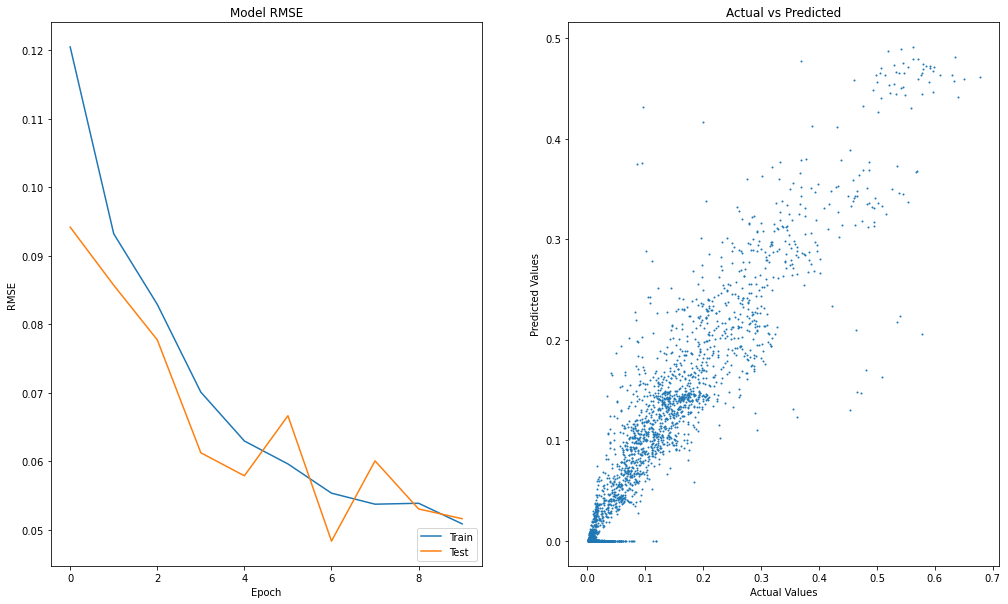

In [1295]:
pred(history_test, model_test)

Each layer has 15 units and epochs equals 15. The loss function converges to 0.0041.

In [1308]:
model_test = deep_learning_3(Data_scaled.shape[1], 15, 15, 15, optimizer_Adam)
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=15, batch_size=batch_size, shuffle=True, 
                              validation_data=(xTest,yTest))

Model: "sequential_236"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_811 (Dense)           (None, 15)                315       
                                                                 
 dropout_544 (Dropout)       (None, 15)                0         
                                                                 
 dense_812 (Dense)           (None, 15)                240       
                                                                 
 dropout_545 (Dropout)       (None, 15)                0         
                                                                 
 dense_813 (Dense)           (None, 15)                240       
                                                                 
 dropout_546 (Dropout)       (None, 15)                0         
                                                                 
 dense_814 (Dense)           (None, 1)              

72/72 [==============================] - 0s 3ms/step
0.04272674066269686
0.0037040330111144572
0.06086076742134014


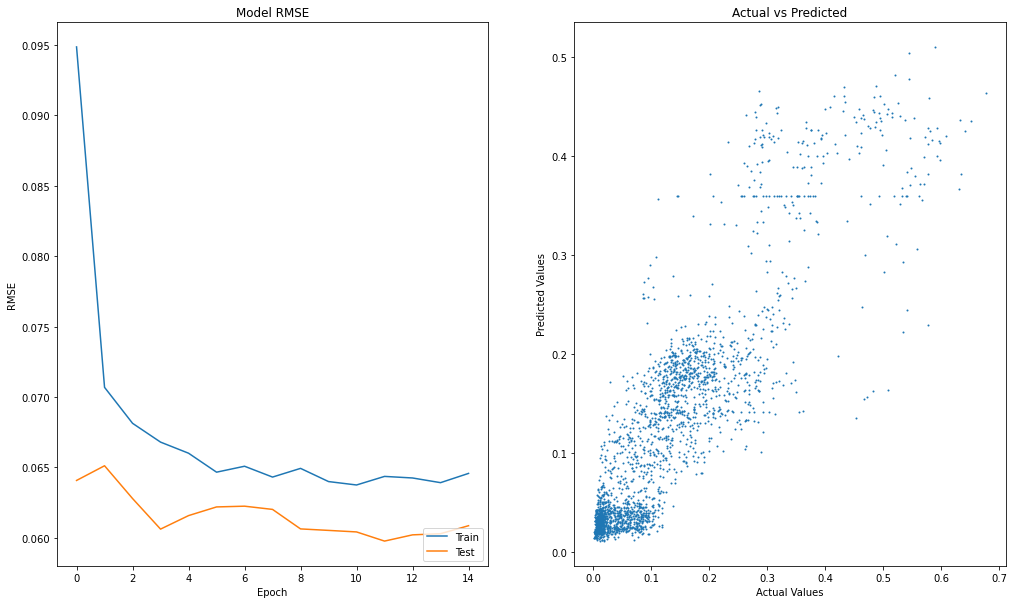

In [1309]:
pred(history_test, model_test)

We increase the layers units to 15. This is the worse model, and predicted values are 0.

In [1282]:
model_test = deep_learning_3(Data_scaled.shape[1], 25, 25, 25, optimizer_Adam)
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, shuffle=True, 
                              validation_data=(xTest,yTest))

Model: "sequential_225"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_767 (Dense)           (None, 25)                475       
                                                                 
 dropout_511 (Dropout)       (None, 25)                0         
                                                                 
 dense_768 (Dense)           (None, 25)                650       
                                                                 
 dropout_512 (Dropout)       (None, 25)                0         
                                                                 
 dense_769 (Dense)           (None, 25)                650       
                                                                 
 dropout_513 (Dropout)       (None, 25)                0         
                                                                 
 dense_770 (Dense)           (None, 1)              

72/72 [==============================] - 1s 5ms/step
0.13063354465864493
0.03307672589759288
0.18187007972064256


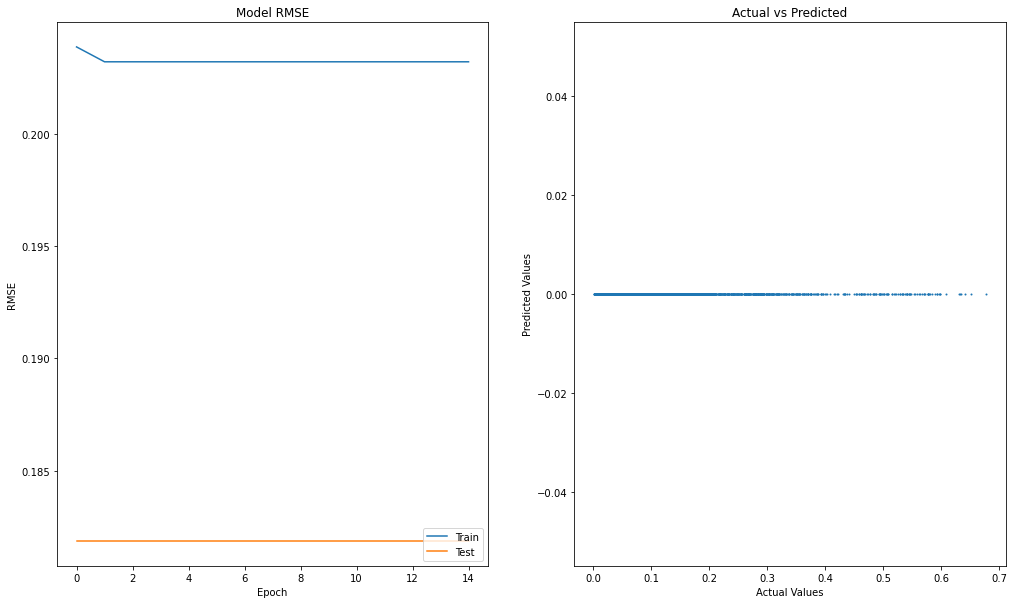

In [1283]:
pred(history_test, model_test)

We try to write a function to predict several models at once, but we fail.

In [1169]:
# def deep_learning_pred(models,x_test, y_test):
#     mse = []
#     mae = []
#     pred = []
#     for i in range(len(models)):
#         prediction = models[i].predict(x_test)
#         pred.append(prediction)
#         mse.append(mean_squared_error(y_test,prediction))
#         mae.append(mean_absolute_error(y_test,prediction))
#     rmse = (np.sqrt(mse))
#     best_mae = np.min(mae)
#     best_mse = np.min(mse)
#     best_rmse = np.min(rmse)
#     index = np.where(rmse == best_rmse)[0][0]
#     a = np.arange(len(rmse))
#     print(f"MAE: {best_mae}")
#     print(f"MSE: {best_mse}")
#     print(f"RMSE: {best_rmse}")  
#     plt.figure(figsize=(17, 10))
#     plt.subplot(2,2,1)
#     plt.plot(a, rmse, label = a)
#     plt.xlabel('Parameters')
#     plt.ylabel('RMSE')
#     plt.xticks(a)
#     plt.title('RMSE of Parameters')
#     plt.subplot(2,2,2)
#     plt.plot(a, mae, label = a)
#     plt.xlabel('Parameters')
#     plt.ylabel('MAE')
#     plt.title('MAE of Parameters')
#     plt.xticks(a)
#     plt.subplot(2,2,3)
#     plt.plot(y_test,pred[index],'o',markersize=1)
#     plt.xlabel("Actual Values")
#     plt.ylabel("Predicted Values")
#     plt.title("Actual vs Predicted")
#     plt.show()

In [1138]:
# optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
# optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
# models = [deep_learning_2(Data_scaled.shape[1], 10, 10, optimizer_SGD),
#           deep_learning_2(Data_scaled.shape[1], 5, 5, optimizer_SGD),
#           deep_learning_2(Data_scaled.shape[1], 10, 5, optimizer_SGD),
#           deep_learning_2(Data_scaled.shape[1], 10, 10, optimizer_Adam),
#           deep_learning_2(Data_scaled.shape[1], 5, 5, optimizer_Adam),
#           deep_learning_2(Data_scaled.shape[1], 10, 5, optimizer_Adam)]

C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [1143]:
# models[]

In [1177]:
# optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
# optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
# models = [deep_learning_3(Data_scaled.shape[1], 10, 10, 10, optimizer_SGD),
#           deep_learning_3(Data_scaled.shape[1], 5, 5, 5, optimizer_SGD),
#           deep_learning_3(Data_scaled.shape[1], 10, 10, 5, optimizer_SGD),
#           deep_learning_3(Data_scaled.shape[1], 10, 10, 10, optimizer_Adam),
#           deep_learning_3(Data_scaled.shape[1], 5, 5, 5, optimizer_Adam),
#           deep_learning_3(Data_scaled.shape[1], 10, 10, 5, optimizer_Adam)]

C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [1230]:
# deep_learning_pred(models, xTest, yTest)

# Section 3: Conlucsion & Insights

Base on our correlation heatmap and models comparision, we find hours data is highly related to the counts of new bike shares. Temperature and humidity also correlate to the count of new bike shares. 

First of all, since the counts of new bike shares normally will have peaks at 8 - 9 AM and 5 - 6 PM, we think this is because many people have to commute to works or schools. These users would like to use bikes regularly, so we can offer them monthly unlimited riding plans with lower prices.

Secondly, the counts of new bike shares will drop a lot during night, so we can give users coupons during these periods. This can help us attract more new users and increase the use of bikes among old users.